In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
df = pd.read_csv("uber.csv")
df.head()

In [ ]:
df.drop(columns=['Unnamed: 0','key'],inplace=True)

In [ ]:
df.info()

#### Dropping null rows

In [ ]:
df.dropna(how='any',inplace=True)

In [ ]:
df.isnull().sum()

### Boxplots

In [ ]:
for col in df.select_dtypes(exclude=['object']):
    plt.figure()
    sns.boxplot(data=df,x=col)

### Dropping outliers

#### -90 < latitude < 90</br>-180 < longitude < 180 </br>fare > 0</br>0 < passenger_count < 50

In [ ]:
df = df[
    (df.pickup_latitude > -90) & (df.pickup_latitude < 90) &
    (df.dropoff_latitude > -90) & (df.dropoff_latitude < 90) &
    (df.pickup_longitude > -180) & (df.pickup_longitude < 180) &
    (df.dropoff_longitude > -180) & (df.dropoff_longitude < 180) & 
    (df.fare_amount > 0) & (df.passenger_count > 0)  & (df.passenger_count < 50)
]

### Calculating Distance

In [ ]:
from math import cos, asin, sqrt, pi
import numpy as np

def distance(lat_1,lon_1,lat_2,lon_2):
#     lat1 = row.pickup_latitude
#     lon1 = row.pickup_longitude
#     lat2 = row.dropoff_latitude
#     lon2 = row.dropoff_longitude
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    
    
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    

    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 +  np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    
    return km

In [ ]:
temp = distance(df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])
temp.head()

In [ ]:
df_new = df.copy()
df_new['Distance'] = temp
df = df_new
df.head()

In [ ]:
sns.boxplot(data=df,x='Distance')

In [ ]:
df = df[(df['Distance'] < 200) & (df['Distance'] > 0)]

### Date and Time features extract

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [ ]:
df['week_day'] = df['pickup_datetime'].dt.day_name()
df['Year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Hour'] = df['pickup_datetime'].dt.hour

In [ ]:
df.drop(columns=['pickup_datetime','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'],inplace=True)

In [ ]:
df.head()

In [ ]:
temp = df.copy()

def convert_week_day(day):
    if day in ['Monday','Tuesday','Wednesday','Thursday']:
        return 0 # Weekday
    return 1 # Weekend

def convert_hour(hour):
    if 5 <= hour <= 12:
        return 1
    elif 12 < hour <= 17:
        return 2
    elif 17 < hour < 24:
        return 3
    return 0

df['week_day'] = temp['week_day'].apply(convert_week_day)
df['Hour'] = temp['Hour'].apply(convert_hour)
df.head()
        

### Correlation Matrix

In [ ]:
df.corr()

In [ ]:
sns.scatterplot(y=df['fare_amount'],x=df['Distance'])

#### Independent Variable: Distance </br> Dependent Variable: fare_amount

In [ ]:
from sklearn.preprocessing import StandardScaler
x = df[['Distance']].values
y = df['fare_amount'].values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,random_state=10)

In [ ]:
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)

In [ ]:
x_test = std_x.transform(x_test)

In [ ]:
std_y = StandardScaler()
y_train = std_y.fit_transform(y_train)

In [ ]:
y_test = std_y.transform(y_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
def fit_predict(model):
    model.fit(x_train,y_train.ravel())
    y_pred = model.predict(x_test)
    r_squared = r2_score(y_test,y_pred)
    RMSE = mean_squared_error(y_test, y_pred,squared=False)
    MAE = mean_absolute_error(y_test,y_pred)
    print('R-squared: ', r_squared)
    print('RMSE: ', RMSE)
    print("MAE:  ",MAE)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
fit_predict(LinearRegression())

In [ ]:
from sklearn.ensemble import RandomForestRegressor
fit_predict(RandomForestRegressor())

Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

First few rows of the dataset:
   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.77264

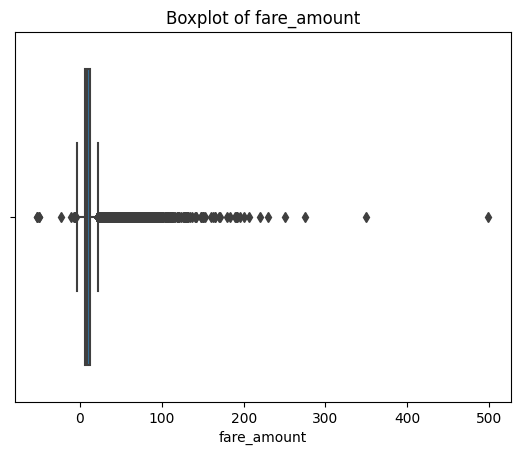

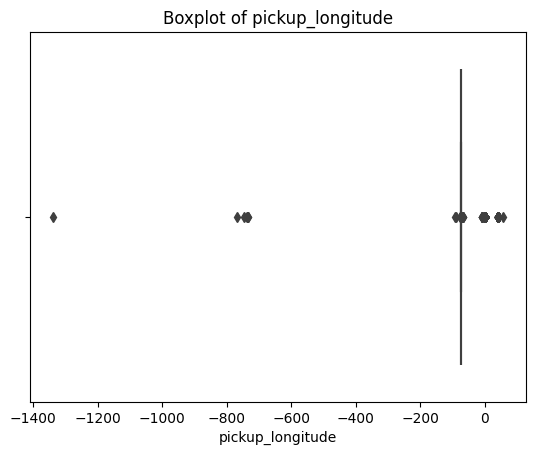

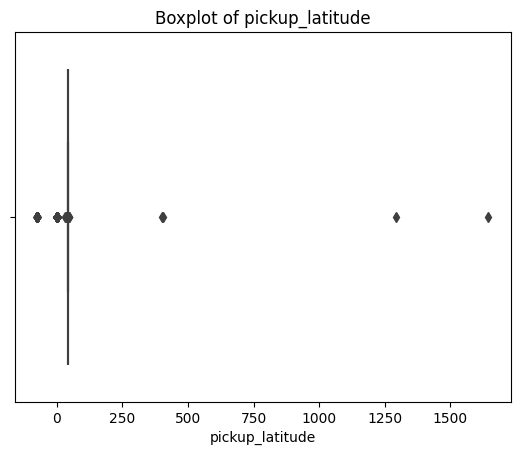

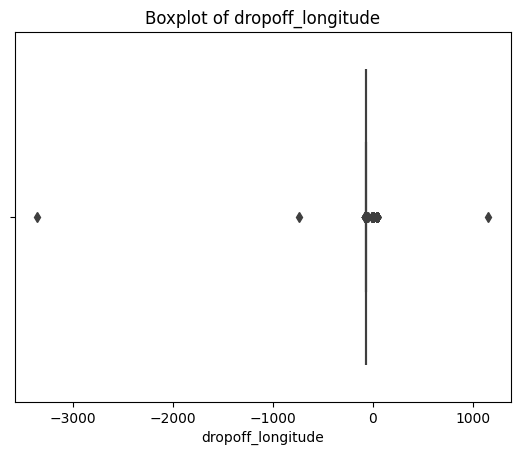

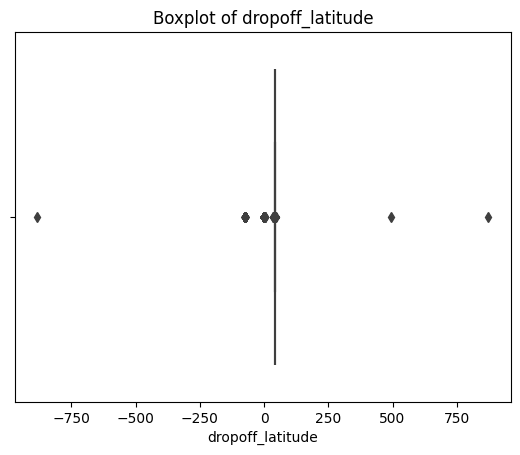

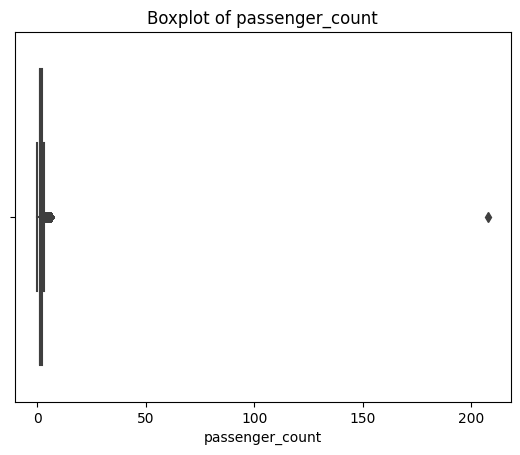


Removing outliers based on distance...


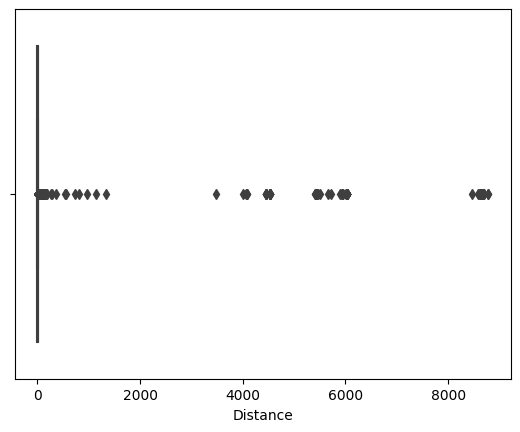


Correlation Matrix:
                 fare_amount  passenger_count  Distance   Weekday      Year  \
fare_amount         1.000000         0.011884  0.778667  0.002305  0.120430   
passenger_count     0.011884         1.000000  0.005112  0.035882  0.005339   
Distance            0.778667         0.005112  1.000000  0.014518  0.018617   
Weekday             0.002305         0.035882  0.014518  1.000000  0.006910   
Year                0.120430         0.005339  0.018617  0.006910  1.000000   
Month               0.024120         0.008818  0.007373 -0.007328 -0.115182   
Hour               -0.020724         0.014738 -0.027176 -0.076373  0.001899   

                    Month      Hour  
fare_amount      0.024120 -0.020724  
passenger_count  0.008818  0.014738  
Distance         0.007373 -0.027176  
Weekday         -0.007328 -0.076373  
Year            -0.115182  0.001899  
Month            1.000000 -0.004307  
Hour            -0.004307  1.000000  


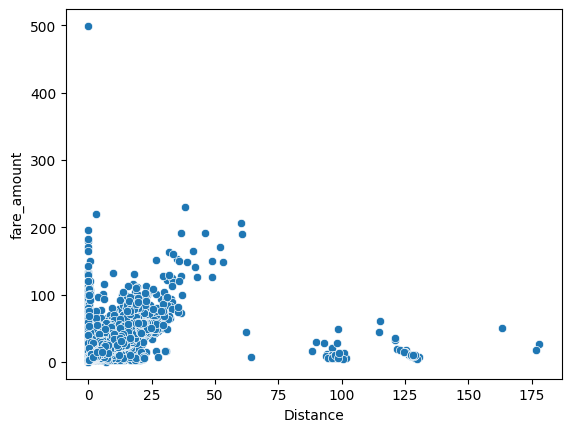


Linear Regression Results:
Model: LinearRegression
R-squared: 0.6218179344464185
RMSE: 5.849169110976399
MAE: 2.6763078937374583
------------------------------

Random Forest Regression Results:
Model: RandomForestRegressor
R-squared: 0.6802765533457847
RMSE: 5.378125793853084
MAE: 2.8424548227146262
------------------------------


In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1. Load and Pre-process the Dataset
df = pd.read_csv("uber.csv")
print("First few rows of the dataset:")
print(df.head())

# Dropping unnecessary columns
df.drop(columns=['Unnamed: 0', 'key'], inplace=True)

# Checking dataset information and handling missing values
print("\nDataset Info:")
df.info()

# Drop missing values
df.dropna(how='any', inplace=True)
print("\nNull values after dropping:", df.isnull().sum())

# 2. Identify Outliers using boxplots
print("\nIdentifying outliers...")
for col in df.select_dtypes(exclude=['object']):
    plt.figure()
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

# Filter out unrealistic values based on latitude, longitude, fare, and passenger count
df = df[
    (df.pickup_latitude > -90) & (df.pickup_latitude < 90) &
    (df.dropoff_latitude > -90) & (df.dropoff_latitude < 90) &
    (df.pickup_longitude > -180) & (df.pickup_longitude < 180) &
    (df.dropoff_longitude > -180) & (df.dropoff_longitude < 180) &
    (df.fare_amount > 0) &
    (df.passenger_count > 0) & (df.passenger_count < 50)
]

# 3. Feature Engineering: Calculate Distance between pickup and dropoff locations
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return 6371 * c  # Radius of Earth in kilometers

df['Distance'] = haversine(df['pickup_latitude'], df['pickup_longitude'], 
                           df['dropoff_latitude'], df['dropoff_longitude'])

# Remove outliers based on distance
print("\nRemoving outliers based on distance...")
sns.boxplot(data=df, x='Distance')
plt.show()


df = df[(df['Distance'] > 0) & (df['Distance'] < 200)]

# 4. Extract DateTime Features
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['Weekday'] = df['pickup_datetime'].dt.day_name()
df['Year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Hour'] = df['pickup_datetime'].dt.hour

# Drop unused columns
df.drop(columns=['pickup_datetime', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], inplace=True)

# Convert categorical features to numerical values
def weekday_to_num(day):
    return 0 if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday'] else 1

df['Weekday'] = df['Weekday'].apply(weekday_to_num)

# 5. Correlation Analysis
print("\nCorrelation Matrix:")
print(df.corr())

# Visualize the relationship between 'Distance' and 'fare_amount'
sns.scatterplot(x='Distance', y='fare_amount', data=df)
plt.show()

# 6. Model Implementation and Evaluation

# Defining features (X) and target variable (y)
X = df[['Distance']]
y = df['fare_amount']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# 7. Model Evaluation Function
def fit_and_evaluate(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r_squared = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"Model: {type(model).__name__}")
    print('R-squared:', r_squared)
    print('RMSE:', rmse)
    print('MAE:', mae)
    print('-' * 30)

# Linear Regression
print("\nLinear Regression Results:")
lr_model = LinearRegression()
fit_and_evaluate(lr_model)

# 8. Random Forest Regression
print("\nRandom Forest Regression Results:")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
fit_and_evaluate(rf_model)
